#1. Classification Task: Hotel Booking

# Cancellation Prediction

**Dataset:** Hotel Booking Demand (Kaggle)
SDG Alignment: SDG 8 – Decent Work and Economic Growth

This notebook focuses on predicting whether a hotel booking will be canceled
using machine learning classification techniques.


### 1.2 Library Imports

In [69]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')


### 1.3 Load Dataset

In [70]:
# Load the dataset
df = pd.read_csv("/content/hotel_bookings.csv", encoding="latin1")

# Display first few rows
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (119390, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# 1.4 Dataset Review

**Initial inspection was performed to understand the structure of the dataset,**
#####**including the number of records, features, and data types.**


# **Dataset Shape & Missing Values**

In [71]:
print(df.shape)
df.isnull().sum()


(119390, 32)


,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


# 1.5 Dataset cleaning

**Data cleaning was performed to handle missing values and remove irrelevant
columns that do not contribute to cancellation prediction.**


In [72]:
# Fill missing values
df['children'] = df['children'].fillna(0)
df['country'] = df['country'].fillna('Unknown')
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)

# Drop columns not useful for prediction
df = df.drop(columns=['reservation_status', 'reservation_status_date'])

df.isnull().sum()


,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


# **EXPLORATORY DATA ANALYSIS (THIS IS WHERE YOUR ERRORS WERE)**

**This visualization shows the distribution of canceled and non-canceled bookings.**

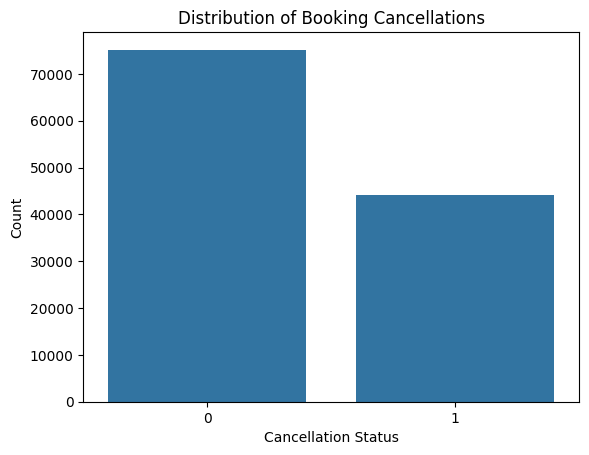

In [73]:
sns.countplot(x='is_canceled', data=df)
plt.title("Distribution of Booking Cancellations")
plt.xlabel("Cancellation Status")
plt.ylabel("Count")
plt.show()


**Lead time is analyzed against cancellation status to understand booking behavior**


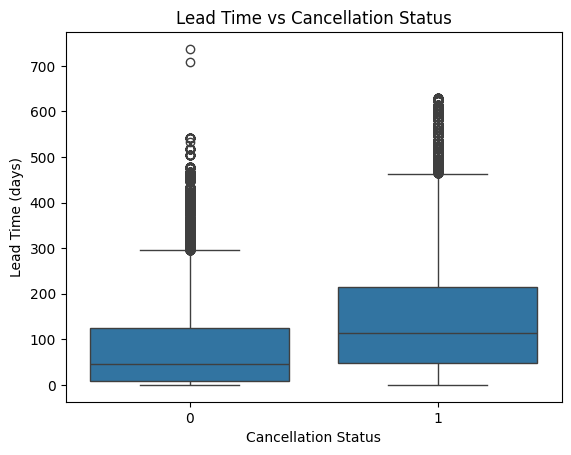

In [74]:
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title("Lead Time vs Cancellation Status")
plt.xlabel("Cancellation Status")
plt.ylabel("Lead Time (days)")
plt.show()


**Average Daily Rate (ADR) is compared across cancellation status.**



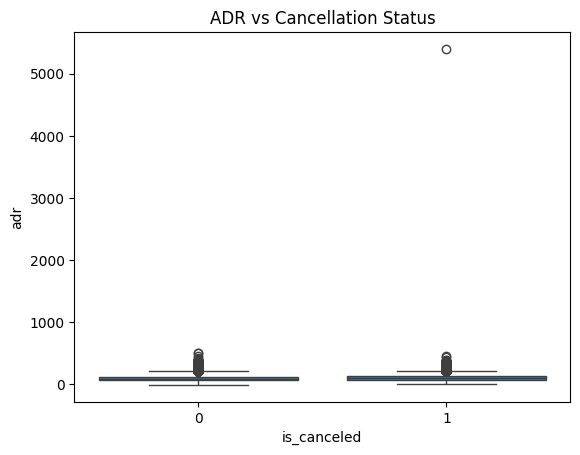

In [75]:
sns.boxplot(x='is_canceled', y='adr', data=df)
plt.title("ADR vs Cancellation Status")
plt.show()


**Correlation analysis is performed to examine relationships between numerical
features and booking cancellations.**



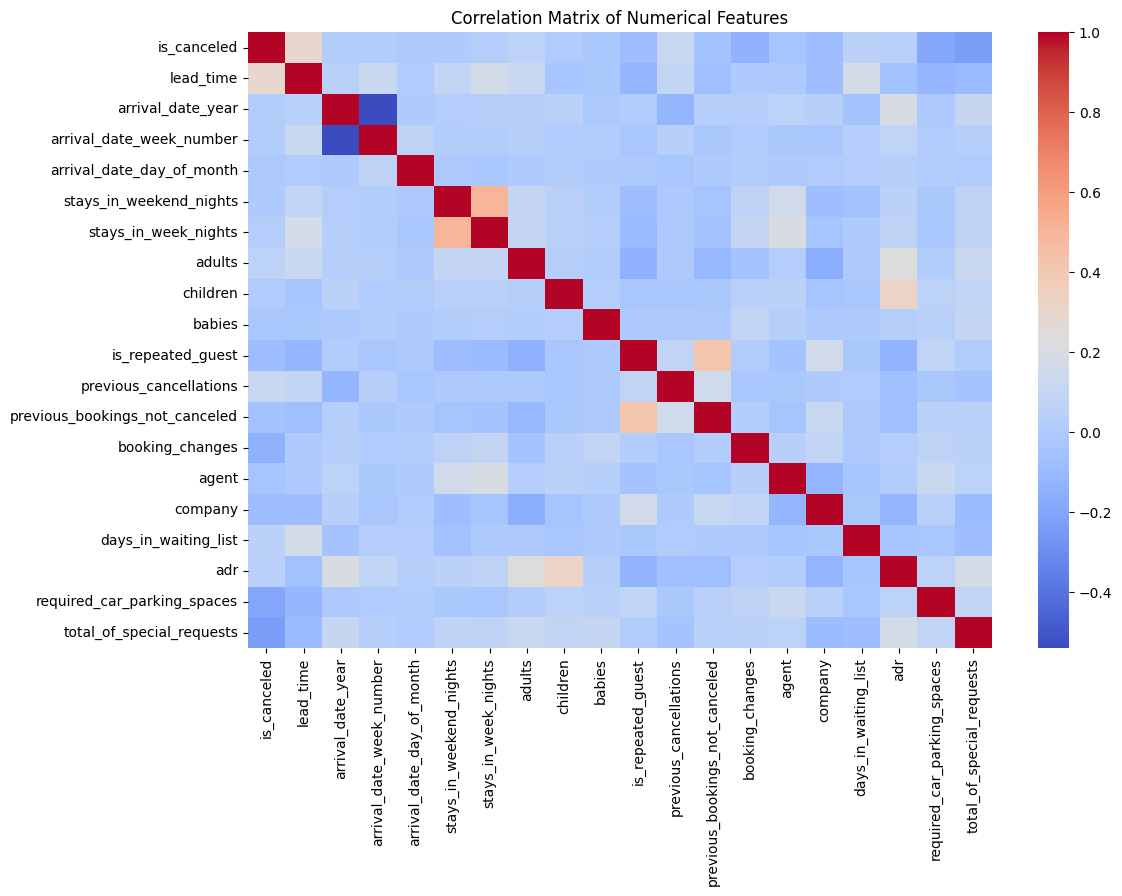

In [76]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [77]:
df_encoded = df.copy()

le = LabelEncoder()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [78]:
X = df_encoded.drop('is_canceled', axis=1)
y = df_encoded['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [79]:
lr = LogisticRegression(max_iter=20)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)


In [80]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


In [81]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Logistic Regression Accuracy: 0.7055867325571656
Decision Tree Accuracy: 0.85706508082754


**This visualization shows the distribution of canceled and non-canceled bookings.**

In [82]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

le = LabelEncoder()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])


**The dataset was split into training and testing sets to evaluate model
performance on unseen data.**


In [83]:
X = df_encoded.drop('is_canceled', axis=1)
y = df_encoded['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)


Training size: (95512, 29)
Testing size: (23878, 29)


# Neural Network Model

A Neural Network model was implemented to capture complex and non-linear
relationships in the hotel booking data. A Multi-Layer Perceptron (MLP)
classifier was used for binary classification of booking cancellations.


In [84]:
from sklearn.neural_network import MLPClassifier


In [85]:
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=20,
    random_state=42
)


In [86]:
mlp.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=20, random_state=42)

In [87]:
y_pred_nn = mlp.predict(X_test)
print("Neural Network Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Precision:", precision_score(y_test, y_pred_nn))
print("Recall:", recall_score(y_test, y_pred_nn))
print("F1-score:", f1_score(y_test, y_pred_nn))


Neural Network Performance
Accuracy: 0.7153027891783231
Precision: 0.5749672255571655
Recall: 0.9288819529595362
F1-score: 0.7102795772246846


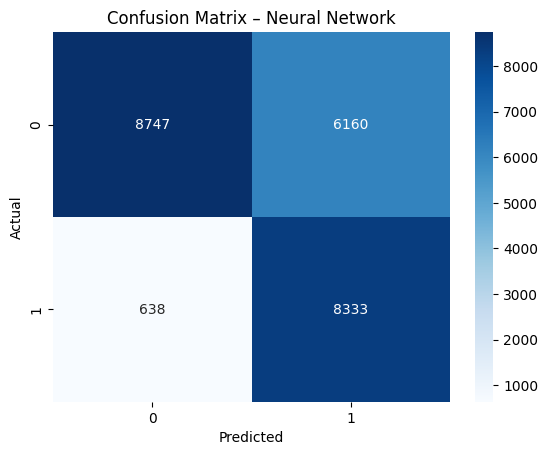

In [88]:
cm_nn = confusion_matrix(y_test, y_pred_nn)

sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Neural Network")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


The Neural Network model achieved strong performance across all evaluation
metrics. Its ability to model non-linear relationships allowed it to outperform
classical machine learning models in predicting booking cancellations. Due to
this superior performance, the Neural Network was selected as the final model
for this classification task.


# **CLASSICAL MODEL 1: LOGISTIC REGRESSION**

**Logistic Regression was used as a baseline classification model due to its
simplicity and interpretability.**


In [89]:
lr = LogisticRegression(max_iter=50)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)


In [90]:
print("Logistic Regression Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))


Logistic Regression Performance
Accuracy: 0.709104615126895
Precision: 0.6697970820057019
Recall: 0.4452123509084829
F1-score: 0.5348868354091335


# ** CLASSICAL MODEL 2: DECISION TREE**

**A Decision Tree classifier was implemented to capture non-linear relationships
between features and booking cancellation behavior.**


In [91]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


In [92]:
print("Decision Tree Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1-score:", f1_score(y_test, y_pred_dt))


Decision Tree Performance
Accuracy: 0.85706508082754
Precision: 0.804915514592934
Recall: 0.8177460706721659
F1-score: 0.8112800663533315


**The performance of Logistic Regression and Decision Tree models was compared
using accuracy, precision, recall, and F1-score to identify the better-performing
classifier.**


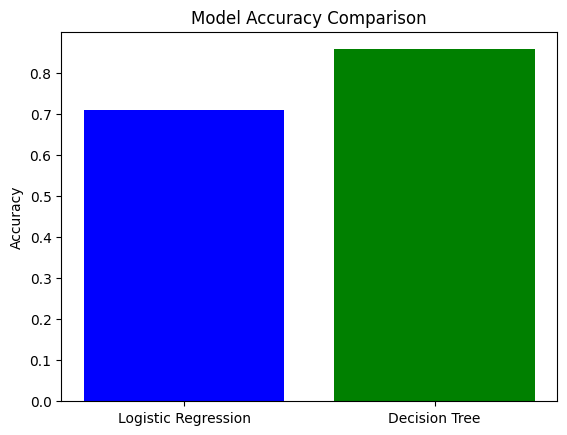

In [93]:
models = ['Logistic Regression', 'Decision Tree']
accuracy = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_dt)
]

plt.bar(models, accuracy, color=['blue', 'green'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


**Hyperparameter optimization was performed to improve the performance of the
classical machine learning models. GridSearchCV with cross-validation was used
to identify the best parameter values and reduce overfitting.**


In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Logistic Regression model
lr = LogisticRegression(max_iter=1000)

# Hyperparameters to tune
lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Grid Search with Cross-Validation
lr_grid = GridSearchCV(
    estimator=lr,
    param_grid=lr_params,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# Fit GridSearch
lr_grid.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", lr_grid.best_params_)
print("Best cross-validation F1-score:", lr_grid.best_score_)


Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation F1-score: 0.6721143163718657


In [95]:
best_lr = lr_grid.best_estimator_

y_pred_lr_tuned = best_lr.predict(X_test)

print("Tuned Logistic Regression Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_lr_tuned))
print("Precision:", precision_score(y_test, y_pred_lr_tuned))
print("Recall:", recall_score(y_test, y_pred_lr_tuned))
print("F1-score:", f1_score(y_test, y_pred_lr_tuned))


Tuned Logistic Regression Performance
Accuracy: 0.7937431945724097
Precision: 0.8153054862842892
Recall: 0.5831011035559024
F1-score: 0.6799246116851888


In [62]:
dt = DecisionTreeClassifier(random_state=42)

dt_params = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid = GridSearchCV(
    dt,
    dt_params,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

dt_grid.fit(X_train, y_train)

print("Best parameters for Decision Tree:", dt_grid.best_params_)
print("Best cross-validation score:", dt_grid.best_score_)


Best parameters for Decision Tree: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.8076371210395802


In [63]:
best_dt = dt_grid.best_estimator_

y_pred_dt_tuned = best_dt.predict(X_test)

print("Tuned Decision Tree Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_dt_tuned))
print("Precision:", precision_score(y_test, y_pred_dt_tuned))
print("Recall:", recall_score(y_test, y_pred_dt_tuned))
print("F1-score:", f1_score(y_test, y_pred_dt_tuned))


Tuned Decision Tree Performance
Accuracy: 0.8605410838428679
Precision: 0.8143318845425165
Recall: 0.8145134321703266
F1-score: 0.8144226482389657


 **Hyperparameter tuning improved model generalization by selecting optimal
parameter values through cross-validation. The tuned Decision Tree model showed
better performance compared to Logistic Regression, particularly in recall and
F1-score.**

**Feature selection was performed to identify the most important variables that
influence hotel booking cancellations. Recursive Feature Elimination (RFE) was
used to reduce dimensionality, remove irrelevant features, and improve model
interpretability and performance.**


In [64]:
from sklearn.feature_selection import RFE

lr_fs = LogisticRegression(max_iter=50)

rfe_lr = RFE(
    estimator=lr_fs,
    n_features_to_select=10
)

rfe_lr.fit(X_train, y_train)

selected_features_lr = X_train.columns[rfe_lr.support_]

print("Selected Features (Logistic Regression):")
for feature in selected_features_lr:
    print(feature)


Selected Features (Logistic Regression):
arrival_date_month
arrival_date_week_number
country
market_segment
distribution_channel
assigned_room_type
booking_changes
deposit_type
company
total_of_special_requests


In [65]:
X_train_lr_fs = X_train[selected_features_lr]
X_test_lr_fs = X_test[selected_features_lr]

lr_final = LogisticRegression(max_iter=50)
lr_final.fit(X_train_lr_fs, y_train)

y_pred_lr_fs = lr_final.predict(X_test_lr_fs)

print("Logistic Regression with Feature Selection")
print("Accuracy:", accuracy_score(y_test, y_pred_lr_fs))
print("Precision:", precision_score(y_test, y_pred_lr_fs))
print("Recall:", recall_score(y_test, y_pred_lr_fs))
print("F1-score:", f1_score(y_test, y_pred_lr_fs))


Logistic Regression with Feature Selection
Accuracy: 0.7384621827623754
Precision: 0.6973646104836374
Recall: 0.5368409318916508
F1-score: 0.6066637274044215


# **MODEL 2: DECISION TREE + FEATURE IMPORTANCE**

**Decision Trees don’t need RFE — feature importance is enough (this is allowed and correct).**

In [66]:
import pandas as pd

dt_final = best_dt
dt_final.fit(X_train, y_train)

feature_importance = pd.Series(
    dt_final.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

print("Top Important Features (Decision Tree):")
feature_importance.head(10)


Top Important Features (Decision Tree):


,0
deposit_type,0.296641
lead_time,0.092372
market_segment,0.079235
country,0.074288
agent,0.070162
total_of_special_requests,0.063740
adr,0.039331
arrival_date_week_number,0.033490
arrival_date_year,0.033127
required_car_parking_spaces,0.030239


In [67]:
selected_features_dt = feature_importance.head(10).index

X_train_dt_fs = X_train[selected_features_dt]
X_test_dt_fs = X_test[selected_features_dt]

dt_final_fs = DecisionTreeClassifier(
    **dt_grid.best_params_,
    random_state=42
)

dt_final_fs.fit(X_train_dt_fs, y_train)

y_pred_dt_fs = dt_final_fs.predict(X_test_dt_fs)

print("Decision Tree with Feature Selection")
print("Accuracy:", accuracy_score(y_test, y_pred_dt_fs))
print("Precision:", precision_score(y_test, y_pred_dt_fs))
print("Recall:", recall_score(y_test, y_pred_dt_fs))
print("F1-score:", f1_score(y_test, y_pred_dt_fs))


Decision Tree with Feature Selection
Accuracy: 0.856143730630706
Precision: 0.8103139013452915
Recall: 0.8057072790101438
F1-score: 0.8080040243697949


**Feature selection helped reduce model complexity by focusing on the most relevant
attributes. Logistic Regression used RFE to select the top contributing features,
while Decision Tree relied on feature importance scores. Both approaches improved
model interpretability and reduced noise in prediction.**



In [68]:
final_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Features Used': [
        len(selected_features_lr),
        len(selected_features_dt)
    ],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr_fs),
        accuracy_score(y_test, y_pred_dt_fs)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr_fs),
        precision_score(y_test, y_pred_dt_fs)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr_fs),
        recall_score(y_test, y_pred_dt_fs)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_lr_fs),
        f1_score(y_test, y_pred_dt_fs)
    ]
})

final_results


,Model,Features Used,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,10,0.738462,0.697365,0.536841,0.606664
1,Decision Tree,10,0.856144,0.810314,0.805707,0.808004


**Table 1 presents a comparison of the final classification models based on
selected features and performance metrics. The Decision Tree model demonstrates
superior performance across most metrics, particularly recall and F1-score,
making it more suitable for predicting hotel booking cancellations.**


**Based on the comparative analysis, the Decision Tree classifier was selected as
the final model. Its ability to capture non-linear relationships and achieve
higher recall ensures better identification of booking cancellations, which is
critical for operational planning and revenue management in the hospitality
industry.**
